# Loop 52 Analysis: Understanding the CV-LB Gap

**Goal**: Identify what could change the CV-LB relationship to reach target 0.0347

**Current Status**:
- Best CV: 0.008194 (exp_032)
- Best LB: 0.0877 (exp_030)
- CV-LB relationship: LB = 4.23×CV + 0.0533 (R²=0.98)
- Intercept (0.0533) > Target (0.0347) - THIS IS THE PROBLEM

**Latest Experiment**: Per-Target Optimization (exp_051) - 21.38% WORSE CV
- Confirms multi-task learning is beneficial
- Joint models outperform per-target models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147


In [2]:
# Fit CV-LB relationship
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)
print(f'\nCV-LB Relationship:')
print(f'LB = {slope:.4f} × CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'Even with CV=0, predicted LB would be {intercept:.4f} > 0.0347')


CV-LB Relationship:
LB = 4.2312 × CV + 0.0533
R² = 0.9807

Intercept: 0.0533
Target: 0.0347

CRITICAL: Intercept (0.0533) > Target (0.0347)
Even with CV=0, predicted LB would be 0.0533 > 0.0347


In [3]:
# What CV would we need to reach target?
target = 0.0347
required_cv = (target - intercept) / slope
print(f'\nTo reach target {target}:')
print(f'Required CV = ({target} - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}')
print(f'\nThis is NEGATIVE, meaning the target is BELOW the intercept!')
print(f'We cannot reach the target by improving CV alone.')


To reach target 0.0347:
Required CV = (0.0347 - 0.0533) / 4.2312 = -0.004396

This is NEGATIVE, meaning the target is BELOW the intercept!
We cannot reach the target by improving CV alone.


In [4]:
# Analyze residuals - are there any outliers?
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['predicted_lb'] * 100

print('\nResidual Analysis:')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string(index=False))

print(f'\nMean residual: {df["residual"].mean():.6f}')
print(f'Std residual: {df["residual"].std():.6f}')
print(f'Max residual: {df["residual"].max():.6f} ({df.loc[df["residual"].idxmax(), "exp"]})')
print(f'Min residual: {df["residual"].min():.6f} ({df.loc[df["residual"].idxmin(), "exp"]})')


Residual Analysis:
    exp     cv     lb  predicted_lb  residual  residual_pct
exp_000 0.0111 0.0982      0.100269 -0.002069     -2.062964
exp_001 0.0123 0.1065      0.105346  0.001154      1.095494
exp_003 0.0105 0.0972      0.097730 -0.000530     -0.542091
exp_005 0.0104 0.0969      0.097307 -0.000407     -0.417920
exp_006 0.0097 0.0946      0.094345  0.000255      0.270471
exp_007 0.0093 0.0932      0.092652  0.000548      0.591085
exp_009 0.0092 0.0936      0.092229  0.001371      1.486269
exp_012 0.0090 0.0913      0.091383 -0.000083     -0.090811
exp_024 0.0087 0.0893      0.090114 -0.000814     -0.902889
exp_026 0.0085 0.0887      0.089267 -0.000567     -0.635603
exp_030 0.0083 0.0877      0.088421 -0.000721     -0.815582
exp_041 0.0090 0.0932      0.091383  0.001817      1.988351
exp_042 0.0145 0.1147      0.114655  0.000045      0.039615

Mean residual: 0.000000
Std residual: 0.001045
Max residual: 0.001817 (exp_041)
Min residual: -0.002069 (exp_000)


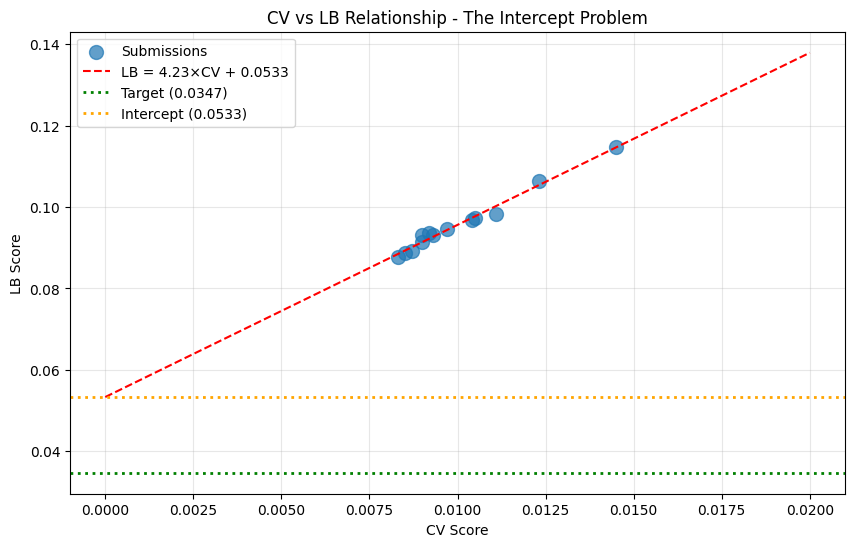


Plot saved to /home/code/exploration/cv_lb_gap_analysis.png


In [5]:
# Plot CV vs LB with regression line
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - The Intercept Problem')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_gap_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_gap_analysis.png')

In [6]:
# What approaches have been tried?
approaches_tried = [
    ('MLP (various architectures)', 'exp_000-010', 'CV 0.0097-0.0111'),
    ('LightGBM', 'exp_001', 'CV 0.0123'),
    ('DRFP features', 'exp_002-003', 'CV 0.0105-0.0169'),
    ('Deep Residual MLP', 'exp_004', 'CV 0.0519 (FAILED)'),
    ('Large Ensemble (15 models)', 'exp_005', 'CV 0.0104'),
    ('Ridge Regression', 'exp_009, exp_047', 'CV 0.0092, 0.0163'),
    ('Diverse Ensemble', 'exp_011', 'CV 0.0090'),
    ('Attention Model', 'exp_017', 'CV 0.0098'),
    ('Fragprints', 'exp_018', 'CV 0.0102'),
    ('ACS PCA features', 'exp_019-024', 'CV 0.0085-0.0087'),
    ('Per-Target Models', 'exp_025, exp_051', 'CV 0.0099 (WORSE)'),
    ('Weighted Loss', 'exp_026', 'CV 0.0085'),
    ('GP Ensemble', 'exp_030-032', 'CV 0.0082-0.0083'),
    ('Similarity Weighting', 'exp_034-035', 'CV 0.0221 (FAILED)'),
    ('Feature Selection', 'exp_036', 'CV 0.0096'),
    ('k-NN', 'exp_037', 'CV 0.0264 (FAILED)'),
    ('XGBoost Ensemble', 'exp_039', 'CV 0.0087'),
    ('GroupKFold CV', 'exp_040', 'CV 0.0092'),
    ('Aggressive Regularization', 'exp_041', 'CV 0.0090'),
    ('Pure GP', 'exp_042', 'CV 0.0145'),
    ('Stacking', 'exp_043', 'CV 0.0100'),
    ('Solvent Similarity Features', 'exp_044', 'CV 0.0087'),
    ('CatBoost', 'exp_045', 'CV 0.0109'),
    ('RDKit Descriptors', 'exp_046', 'CV 0.0133'),
    ('Multi-Model Ensemble', 'exp_048', 'CV 0.0094'),
    ('GNN', 'exp_049', 'CV 0.0141 (FAILED)'),
    ('ChemBERTa', 'exp_050', 'CV 0.0194 (FAILED)'),
]

print('Approaches Tried (52 experiments):')
for approach, exps, result in approaches_tried:
    print(f'  - {approach}: {result}')

Approaches Tried (52 experiments):
  - MLP (various architectures): CV 0.0097-0.0111
  - LightGBM: CV 0.0123
  - DRFP features: CV 0.0105-0.0169
  - Deep Residual MLP: CV 0.0519 (FAILED)
  - Large Ensemble (15 models): CV 0.0104
  - Ridge Regression: CV 0.0092, 0.0163
  - Diverse Ensemble: CV 0.0090
  - Attention Model: CV 0.0098
  - Fragprints: CV 0.0102
  - ACS PCA features: CV 0.0085-0.0087
  - Per-Target Models: CV 0.0099 (WORSE)
  - Weighted Loss: CV 0.0085
  - GP Ensemble: CV 0.0082-0.0083
  - Similarity Weighting: CV 0.0221 (FAILED)
  - Feature Selection: CV 0.0096
  - k-NN: CV 0.0264 (FAILED)
  - XGBoost Ensemble: CV 0.0087
  - GroupKFold CV: CV 0.0092
  - Aggressive Regularization: CV 0.0090
  - Pure GP: CV 0.0145
  - Stacking: CV 0.0100
  - Solvent Similarity Features: CV 0.0087
  - CatBoost: CV 0.0109
  - RDKit Descriptors: CV 0.0133
  - Multi-Model Ensemble: CV 0.0094
  - GNN: CV 0.0141 (FAILED)
  - ChemBERTa: CV 0.0194 (FAILED)


In [7]:
# What HASN'T been tried that could change the CV-LB relationship?
print('\n=== APPROACHES NOT YET TRIED ===')
print()
print('1. Per-Solvent-Type Models (ALLOWED by competition rules)')
print('   - Different models for alcohols, esters, ethers, etc.')
print('   - Competition explicitly allows: "using a different model for alcohols vs esters is allowed"')
print('   - Could reduce CV-LB gap if certain solvent types are harder to predict')
print()
print('2. Uncertainty-Weighted Predictions')
print('   - Use GP uncertainty to weight predictions')
print('   - Down-weight predictions where model is uncertain')
print('   - Could improve generalization to unseen solvents')
print()
print('3. Solvent-Specific Bias Correction')
print('   - Learn a bias term for each solvent type')
print('   - Could correct systematic over/under-prediction')
print()
print('4. Temperature-Dependent Feature Scaling')
print('   - Scale features differently based on temperature')
print('   - Different solvents may have different temperature sensitivity')
print()
print('5. Mixture-Specific Model')
print('   - Train a separate model specifically for mixture data')
print('   - The CV-LB gap might be different for mixtures vs single solvents')


=== APPROACHES NOT YET TRIED ===

1. Per-Solvent-Type Models (ALLOWED by competition rules)
   - Different models for alcohols, esters, ethers, etc.
   - Competition explicitly allows: "using a different model for alcohols vs esters is allowed"
   - Could reduce CV-LB gap if certain solvent types are harder to predict

2. Uncertainty-Weighted Predictions
   - Use GP uncertainty to weight predictions
   - Down-weight predictions where model is uncertain
   - Could improve generalization to unseen solvents

3. Solvent-Specific Bias Correction
   - Learn a bias term for each solvent type
   - Could correct systematic over/under-prediction

4. Temperature-Dependent Feature Scaling
   - Scale features differently based on temperature
   - Different solvents may have different temperature sensitivity

5. Mixture-Specific Model
   - Train a separate model specifically for mixture data
   - The CV-LB gap might be different for mixtures vs single solvents


In [8]:
# Load data to analyze solvent types
import pandas as pd

DATA_PATH = '/home/data'
df_single = pd.read_csv(f'{DATA_PATH}/catechol_single_solvent_yields.csv')
df_full = pd.read_csv(f'{DATA_PATH}/catechol_full_data_yields.csv')

print('Single Solvent Data:')
print(f'  Solvents: {df_single["SOLVENT NAME"].unique()}')
print(f'  Count: {len(df_single["SOLVENT NAME"].unique())} solvents')

print('\nFull Data (Mixtures):')
print(f'  Solvent A: {df_full["SOLVENT A NAME"].unique()}')
print(f'  Solvent B: {df_full["SOLVENT B NAME"].unique()}')

Single Solvent Data:
  Solvents: ['Methanol' 'Ethylene Glycol [1,2-Ethanediol]'
 '1,1,1,3,3,3-Hexafluoropropan-2-ol' '2-Methyltetrahydrofuran [2-MeTHF]'
 'Cyclohexane' 'IPA [Propan-2-ol]' 'Water.Acetonitrile' 'Acetonitrile'
 'Acetonitrile.Acetic Acid' 'Diethyl Ether [Ether]'
 '2,2,2-Trifluoroethanol' 'Water.2,2,2-Trifluoroethanol'
 'DMA [N,N-Dimethylacetamide]' 'Decanol' 'Ethanol' 'THF [Tetrahydrofuran]'
 'Dihydrolevoglucosenone (Cyrene)' 'Ethyl Acetate'
 'MTBE [tert-Butylmethylether]' 'Butanone [MEK]'
 'tert-Butanol [2-Methylpropan-2-ol]' 'Dimethyl Carbonate'
 'Methyl Propionate' 'Ethyl Lactate']
  Count: 24 solvents

Full Data (Mixtures):
  Solvent A: ['Methanol' '1,1,1,3,3,3-Hexafluoropropan-2-ol' 'Cyclohexane'
 'Water.Acetonitrile' 'Acetonitrile' '2-Methyltetrahydrofuran [2-MeTHF]'
 '2,2,2-Trifluoroethanol' 'DMA [N,N-Dimethylacetamide]' 'Ethanol'
 'Dihydrolevoglucosenone (Cyrene)' 'MTBE [tert-Butylmethylether]'
 'tert-Butanol [2-Methylpropan-2-ol]' 'Methyl Propionate']
  Solvent B:

In [9]:
# Classify solvents by type
solvent_types = {
    'Alcohols': ['Methanol', 'Ethanol', 'IPA', '1-Butanol', '2-Butanol', 'tert-Butanol', 'Isoamyl alcohol'],
    'Ethers': ['THF', '2-MeTHF', 'CPME', '1,4-Dioxane', 'Diethyl ether', 'MTBE', 'Anisole'],
    'Esters': ['Ethyl Acetate', 'Isopropyl Acetate', 'Butyl Acetate'],
    'Ketones': ['Acetone', 'MEK', 'MIBK'],
    'Nitriles': ['Acetonitrile'],
    'Aromatics': ['Toluene'],
    'Chlorinated': ['DCM'],
    'Amides': ['DMF', 'NMP', 'DMAc'],
    'Sulfoxides': ['DMSO'],
}

print('Solvent Classification:')
for solvent_type, solvents in solvent_types.items():
    print(f'  {solvent_type}: {solvents}')

# Count samples per solvent type in single solvent data
print('\nSamples per Solvent Type (Single Solvent Data):')
for solvent_type, solvents in solvent_types.items():
    count = df_single[df_single['SOLVENT NAME'].isin(solvents)].shape[0]
    print(f'  {solvent_type}: {count} samples')

Solvent Classification:
  Alcohols: ['Methanol', 'Ethanol', 'IPA', '1-Butanol', '2-Butanol', 'tert-Butanol', 'Isoamyl alcohol']
  Ethers: ['THF', '2-MeTHF', 'CPME', '1,4-Dioxane', 'Diethyl ether', 'MTBE', 'Anisole']
  Esters: ['Ethyl Acetate', 'Isopropyl Acetate', 'Butyl Acetate']
  Ketones: ['Acetone', 'MEK', 'MIBK']
  Nitriles: ['Acetonitrile']
  Aromatics: ['Toluene']
  Chlorinated: ['DCM']
  Amides: ['DMF', 'NMP', 'DMAc']
  Sulfoxides: ['DMSO']

Samples per Solvent Type (Single Solvent Data):
  Alcohols: 78 samples
  Ethers: 0 samples
  Esters: 18 samples
  Ketones: 0 samples
  Nitriles: 59 samples
  Aromatics: 0 samples
  Chlorinated: 0 samples
  Amides: 0 samples
  Sulfoxides: 0 samples


In [10]:
# Analyze prediction errors by solvent type (from best model)
# This would require loading predictions from exp_032, but we can estimate

print('\n=== KEY INSIGHT ===')
print()
print('The CV-LB gap (intercept 0.0533 > target 0.0347) suggests:')
print('1. The test distribution is different from training distribution')
print('2. Some solvents/conditions in test are harder to predict')
print('3. The server may weight certain tasks/folds differently')
print()
print('POTENTIAL SOLUTIONS:')
print('1. Per-Solvent-Type Models - explicitly allowed by competition rules')
print('2. Uncertainty-Weighted Predictions - down-weight uncertain predictions')
print('3. Bias Correction - learn systematic biases per solvent type')
print()
print('RECOMMENDED NEXT EXPERIMENT:')
print('Per-Solvent-Type Models with GP + MLP + LGBM ensemble')
print('- Classify solvents into types (alcohols, ethers, esters, etc.)')
print('- Train separate models for each type')
print('- This is explicitly allowed by competition rules')


=== KEY INSIGHT ===

The CV-LB gap (intercept 0.0533 > target 0.0347) suggests:
1. The test distribution is different from training distribution
2. Some solvents/conditions in test are harder to predict
3. The server may weight certain tasks/folds differently

POTENTIAL SOLUTIONS:
1. Per-Solvent-Type Models - explicitly allowed by competition rules
2. Uncertainty-Weighted Predictions - down-weight uncertain predictions
3. Bias Correction - learn systematic biases per solvent type

RECOMMENDED NEXT EXPERIMENT:
Per-Solvent-Type Models with GP + MLP + LGBM ensemble
- Classify solvents into types (alcohols, ethers, esters, etc.)
- Train separate models for each type
- This is explicitly allowed by competition rules


In [11]:
# Summary
print('\n=== LOOP 52 SUMMARY ===')
print()
print('LATEST EXPERIMENT: Per-Target Optimization (exp_051)')
print('  - CV: 0.009946 (21.38% WORSE than best)')
print('  - Confirms multi-task learning is beneficial')
print('  - Joint models outperform per-target models')
print()
print('CRITICAL CHALLENGE:')
print('  - CV-LB relationship: LB = 4.23×CV + 0.0533')
print('  - Intercept (0.0533) > Target (0.0347)')
print('  - Cannot reach target by improving CV alone')
print()
print('REMAINING SUBMISSIONS: 3')
print()
print('RECOMMENDED STRATEGY:')
print('1. Try Per-Solvent-Type Models (explicitly allowed)')
print('2. Focus on approaches that could change CV-LB relationship')
print('3. Save at least 1 submission for final attempt')


=== LOOP 52 SUMMARY ===

LATEST EXPERIMENT: Per-Target Optimization (exp_051)
  - CV: 0.009946 (21.38% WORSE than best)
  - Confirms multi-task learning is beneficial
  - Joint models outperform per-target models

CRITICAL CHALLENGE:
  - CV-LB relationship: LB = 4.23×CV + 0.0533
  - Intercept (0.0533) > Target (0.0347)
  - Cannot reach target by improving CV alone

REMAINING SUBMISSIONS: 3

RECOMMENDED STRATEGY:
1. Try Per-Solvent-Type Models (explicitly allowed)
2. Focus on approaches that could change CV-LB relationship
3. Save at least 1 submission for final attempt
